### This dataset is based on the pascal heart sound challenge, but this one has metadata as .csv file which helps us a lot


In [1]:
import numpy as np
import pandas as pd


### EDA

In [2]:
set_a=pd.read_csv(r"C:\Users\utfu\Downloads\Heart Sound Classification\set_a.csv")
set_b=pd.read_csv(r"C:\Users\utfu\Downloads\Heart Sound Classification\set_b.csv")
set_a.head


<bound method NDFrame.head of     dataset                             fname     label  sublabel
0         a  set_a/artifact__201012172012.wav  artifact       NaN
1         a  set_a/artifact__201105040918.wav  artifact       NaN
2         a  set_a/artifact__201105041959.wav  artifact       NaN
3         a  set_a/artifact__201105051017.wav  artifact       NaN
4         a  set_a/artifact__201105060108.wav  artifact       NaN
..      ...                               ...       ...       ...
171       a          set_a/__201108222241.wav       NaN       NaN
172       a          set_a/__201108222244.wav       NaN       NaN
173       a          set_a/__201108222247.wav       NaN       NaN
174       a          set_a/__201108222254.wav       NaN       NaN
175       a          set_a/__201108222257.wav       NaN       NaN

[176 rows x 4 columns]>

In [3]:
set_b.head

<bound method NDFrame.head of     dataset                                              fname       label  \
0         b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1         b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2         b  set_b/Btraining_extrastole_130_1306347376079_D...  extrastole   
3         b  set_b/Btraining_extrastole_134_1306428161797_C...  extrastole   
4         b  set_b/Btraining_extrastole_138_1306762146980_B...  extrastole   
..      ...                                                ...         ...   
651       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
653       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
654       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
655       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   

        sublabel  
0            N

Set A

In [4]:
temp=set_a["label"].value_counts(dropna=False)
print(temp)
temp1=np.array(("null","artifact","murmur","normal","extrahls"))

NaN         52
artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64


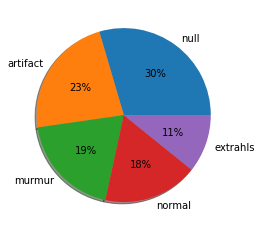

In [5]:
import matplotlib.pyplot as plt
seta_labels= np.array(temp)
plt.figure(facecolor='white')
plt.pie(seta_labels, labels=temp1, shadow=True, autopct = '%.0f%%')
plt.show()


Set B

In [6]:
temp2=set_b["label"].value_counts(dropna=False)

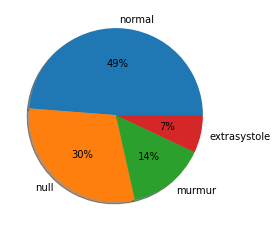

In [7]:
import matplotlib.pyplot as plt
setb_labels= np.array(temp2)
plt.figure(facecolor='white')
plt.pie(setb_labels, labels=("normal","null","murmur","extrasystole"), shadow=True, autopct = '%.0f%%')
plt.show()

Set A and B Combined

In [8]:
set_ab= [set_a,set_b]
set_ab=pd.concat(set_ab)
set_ab

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN
...,...,...,...,...
651,b,set_b/Btraining_normal_Btraining_noisynormal_2...,normal,noisynormal
652,b,set_b/Btraining_normal_Btraining_noisynormal_2...,normal,noisynormal
653,b,set_b/Btraining_normal_Btraining_noisynormal_2...,normal,noisynormal
654,b,set_b/Btraining_normal_Btraining_noisynormal_2...,normal,noisynormal


In [9]:
temp3=set_ab["label"].value_counts(dropna=False)
print(temp3)

normal        351
NaN           247
murmur        129
extrastole     46
artifact       40
extrahls       19
Name: label, dtype: int64


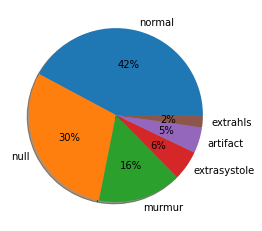

In [10]:
setab_labels= np.array(temp3)
plt.figure(facecolor='white')
plt.pie(setab_labels, labels=("normal","null","murmur","extrasystole","artifact","extrahls"), shadow=True, autopct = '%.0f%%')
plt.show()

In [11]:
set_ab.isnull().sum()

dataset       0
fname         0
label       247
sublabel    683
dtype: int64

### Now, we put test data as the unlabelled set of data, or we could directly drop the null label values.

test data being unlabelled data

In [12]:
#test_ab= set_ab[set_ab['label'].isnull()]
#test_ab.shape

dropna

In [13]:
set_ab=set_ab.dropna(subset=['label'])
set_ab.shape

(585, 4)

dropping sublabel and dataset label cuz they useless!!!!!

In [14]:
train_data= set_ab.drop(["sublabel","dataset"],axis="columns")
train_data

,fname,label
0,set_a/artifact__201012172012.wav,artifact
1,set_a/artifact__201105040918.wav,artifact
2,set_a/artifact__201105041959.wav,artifact
3,set_a/artifact__201105051017.wav,artifact
4,set_a/artifact__201105060108.wav,artifact
...,...,...
651,set_b/Btraining_normal_Btraining_noisynormal_2...,normal
652,set_b/Btraining_normal_Btraining_noisynormal_2...,normal
653,set_b/Btraining_normal_Btraining_noisynormal_2...,normal
654,set_b/Btraining_normal_Btraining_noisynormal_2...,normal


In [15]:
train_data=train_data.reset_index()
train_data.isnull().sum()

index    0
fname    0
label    0
dtype: int64

In [16]:

train_data

,index,fname,label
0,0,set_a/artifact__201012172012.wav,artifact
1,1,set_a/artifact__201105040918.wav,artifact
2,2,set_a/artifact__201105041959.wav,artifact
3,3,set_a/artifact__201105051017.wav,artifact
4,4,set_a/artifact__201105060108.wav,artifact
...,...,...,...
580,651,set_b/Btraining_normal_Btraining_noisynormal_2...,normal
581,652,set_b/Btraining_normal_Btraining_noisynormal_2...,normal
582,653,set_b/Btraining_normal_Btraining_noisynormal_2...,normal
583,654,set_b/Btraining_normal_Btraining_noisynormal_2...,normal


creating a dataframe of audio files and their category

In [17]:
df_path=[]
df_classes=[]
for path_number in range(len(train_data)):
    path_name=  str(train_data["fname"][path_number])
    df_path.append(path_name)
    df_classes.append(train_data["label"][path_number])

In [18]:
df_path = pd.Series(df_path,name="WAV").astype(str)
df_classes = pd.Series(df_classes,name="CATEGORY")
df=pd.concat([df_path,df_classes], axis=1)

 edited path name
 

In [19]:
from re import search
for ind,i in enumerate(df.WAV):
    if search("Btraining",i):
        i=i.replace("Btraining_","")
    if ind<=435 and ind>123:
        i=i.replace("normal_","normal__")
        i=i.replace("extrastole_","extrastole__")
        i=i.replace("murmur_","murmur__")
    df.iloc[ind]["WAV"]=i

making data of each category

In [20]:
normal_data = df[df['CATEGORY']=="normal"].reset_index()
normal_data.drop("index",axis="columns",inplace=True)

artifact_data = df[df['CATEGORY']=="artifact"].reset_index()
artifact_data.drop("index",axis="columns",inplace=True)

murmur_data = df[df['CATEGORY']=="murmur"].reset_index()
murmur_data.drop("index",axis="columns",inplace=True)

extrastole_data = df[df['CATEGORY']=="extrastole"].reset_index()
extrastole_data.drop("index",axis="columns",inplace=True)

extrahls_data = df[df['CATEGORY']=="extrahls"].reset_index()
extrahls_data.drop("index",axis="columns",inplace=True)

full_table=pd.concat([normal_data,artifact_data,murmur_data,extrastole_data,extrahls_data])
full_table.to_csv("xd.csv")
full_table

,WAV,CATEGORY
0,set_a/normal__201101070538.wav,normal
1,set_a/normal__201101151127.wav,normal
2,set_a/normal__201102081152.wav,normal
3,set_a/normal__201102081321.wav,normal
4,set_a/normal__201102201230.wav,normal
...,...,...
14,set_a/extrahls__201103200218.wav,extrahls
15,set_a/extrahls__201104021355.wav,extrahls
16,set_a/extrahls__201104140118.wav,extrahls
17,set_a/extrahls__201104270458.wav,extrahls


In [21]:
x=df.groupby("CATEGORY")["CATEGORY"].count()
x

CATEGORY
artifact       40
extrahls       19
extrastole     46
murmur        129
normal        351
Name: CATEGORY, dtype: int64

([<matplotlib.patches.Wedge at 0x2063c77bca0>,
 [Text(1.0747186590158246, 0.23447772594263216, 'artifact'),
  Text(0.9481666186074488, 0.5576558646320479, 'extrahls'),
  Text(0.7002556238986901, 0.8483171937419732, 'extrastole'),
  Text(-0.27184207642361885, 1.0658808026630817, 'murmur'),
  Text(-0.3399185517867208, -1.0461622140716127, 'normal')],
 [Text(0.5862101776449952, 0.1278969414232539, '7%'),
  Text(0.5171817919676993, 0.30417592616293515, '3%'),
  Text(0.3819576130356491, 0.4627184693138035, '8%'),
  Text(-0.14827749623106481, 0.5813895287253172, '22%'),
  Text(-0.18541011915639313, -0.5706339349481523, '60%')])

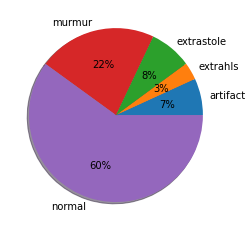

In [22]:
labels = ['artifact', 'extrahls', 'extrastole', 'murmur', 'normal']
plt.pie(x, labels=labels  ,shadow=True, autopct = '%.0f%%')

In [23]:
from IPython.display import Audio
import IPython.display as ipd
import librosa
import librosa.display

random audio file

playsound function


In [24]:
def playing_function(sound_address):
    sample_sound, sample_rate = librosa.load(sound_address)
    sample_audio = ipd.Audio(sample_sound, rate=sample_rate)

    return sample_audio

waveplot function

In [25]:
def waveplot_function(sound_address):
    figure = plt.figure(figsize=(14,6))
    
    sample_sound, sample_rate = librosa.load(sound_address)    
    librosa.display.waveshow(sample_sound,sr=sample_rate)

spectrum

In [26]:
def spectrum(sound_address):
    sample_sound, sample_rate = librosa.load(sound_address) 
    fft = np.fft.fft(sample_sound)
    magnitude = np.abs(fft)
    freq = np.linspace(0,sample_rate, len(magnitude)) 
    half_freq = freq[:int(len(freq)/2)]
    half_magnitude = magnitude[:int(len(freq)/2)]

    plt.figure(figsize=(12,8))
    plt.plot(half_freq,half_magnitude)
    plt.title("Spectrum")
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.show()

spectrogram FOR CNN

In [27]:
import tensorflow as tf

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


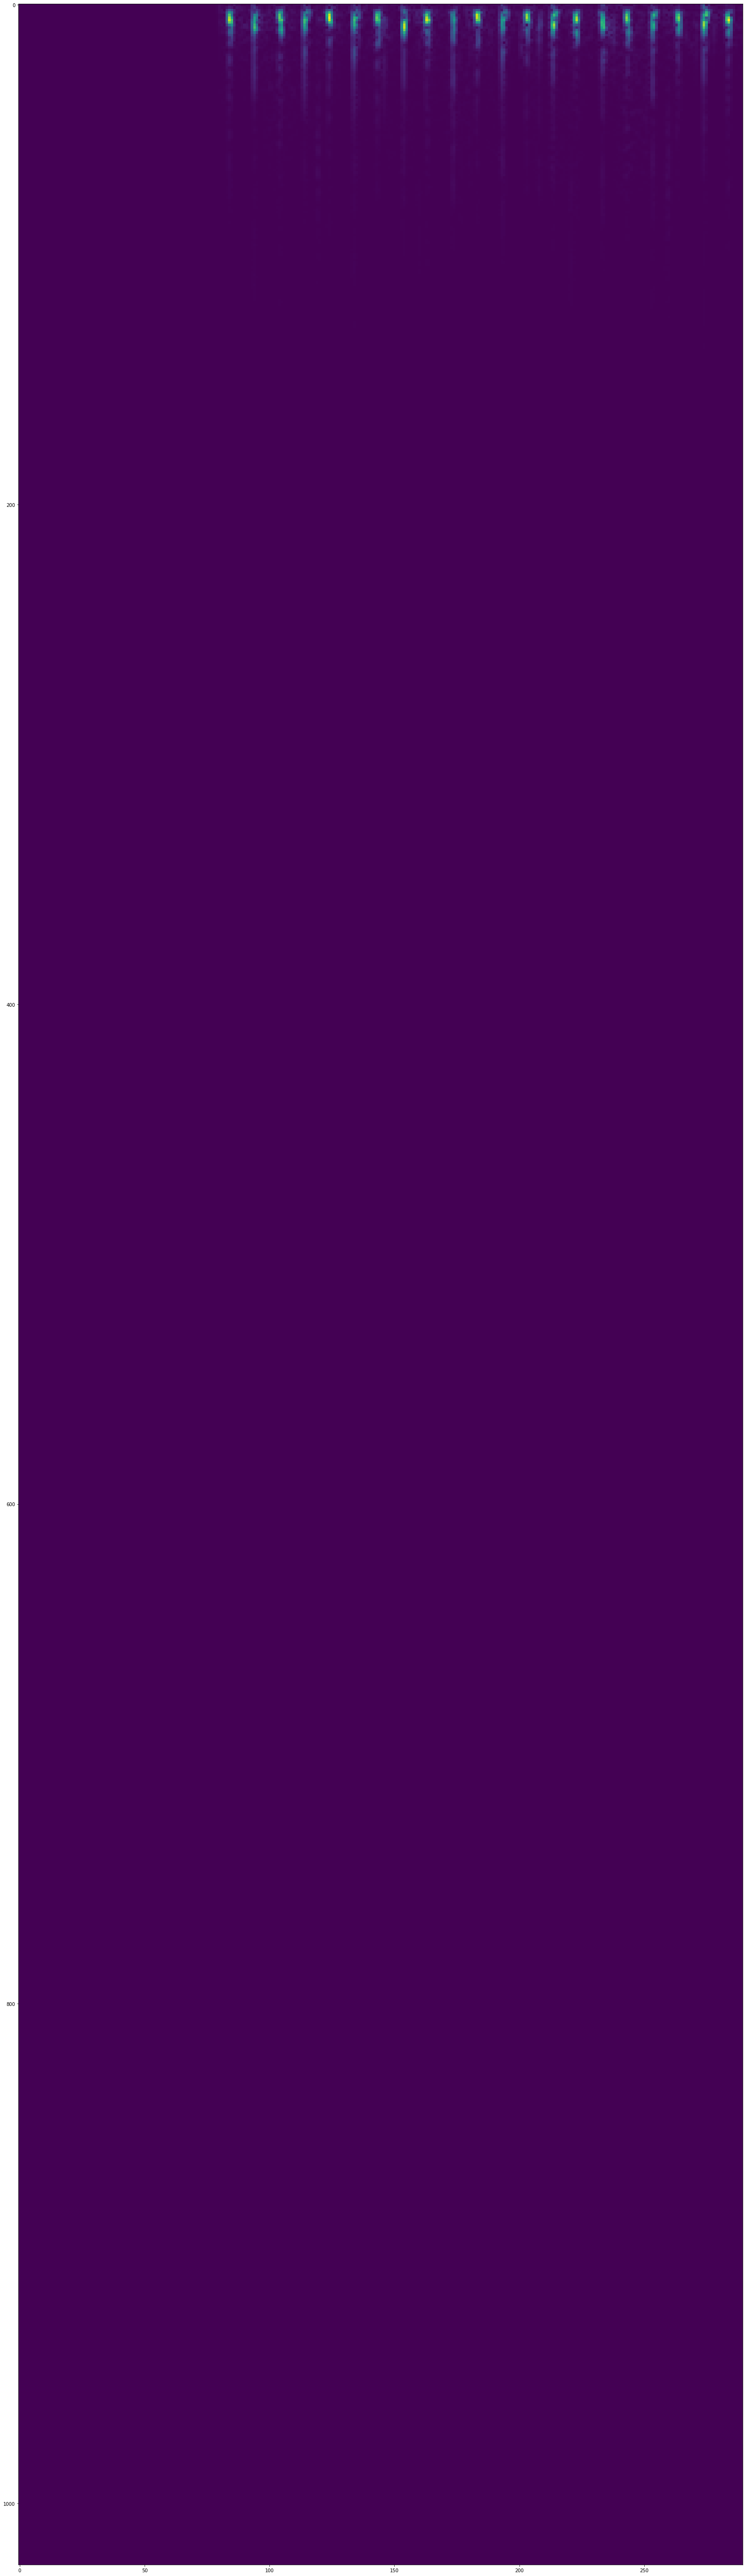

In [28]:
random_audio=np.random.randint(0,len(full_table))

address=full_table.iloc[random_audio]["WAV"]
sound,sample_rate=librosa.load(address)
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

    # calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))
sound=sound[:150037]
padding=tf.zeros([150037]-tf.shape(sound), dtype=tf.float32)
wav=tf.concat([padding,sound],0)
spectrogram=tf.signal.stft(wav,frame_length=n_fft, frame_step=hop_length)
spectrogram=tf.abs(spectrogram)
spectrogram=tf.expand_dims(spectrogram, axis=2)

plt.figure(figsize=(100,100))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()


Spectrogram Dataloading Function

In [29]:
import os, fnmatch
def preprocess(folder_name,path_name):
    data = []    
    for file_name in path_name:
        audioo=folder_name+file_name
        lengths=[]
        labels=[]
        audio, sr2=librosa.load(audioo)
        audio=audio[:150037]
        padding=tf.zeros([150037]-tf.shape(audio), dtype=tf.float32)
        wav=tf.concat([padding,audio],0)
        spectrogram=tf.signal.stft(wav,frame_length=n_fft, frame_step=hop_length)
        spectrogram=tf.abs(spectrogram)
        spectrogram=tf.expand_dims(spectrogram, axis=2)
        
        data.append(spectrogram)
              
                     
        
            
    return data
    
        
        
    
    
INPUT_DIR="C:\\Users\\utfu\\Downloads\\Heart Sound Classification"
A_folder=INPUT_DIR+'/set_a/'
# set-a
A_artifact_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'artifact*.wav')
A_artifact_sounds = preprocess(folder_name=A_folder, path_name=A_artifact_files)
A_artifact_labels = [0 for items in A_artifact_files]

A_normal_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'normal*.wav')
A_normal_sounds = preprocess(folder_name=A_folder, path_name=A_normal_files)
A_normal_labels = [2 for items in A_normal_sounds]

A_extrahls_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'extrahls*.wav')
A_extrahls_sounds = preprocess(folder_name=A_folder, path_name=A_extrahls_files)
A_extrahls_labels = [1 for items in A_extrahls_sounds]

A_murmur_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'murmur*.wav')
A_murmur_sounds = preprocess(folder_name=A_folder, path_name=A_murmur_files)
A_murmur_labels = [1 for items in A_murmur_files]




B_folder=INPUT_DIR+'/set_b/'
# set-b
B_normal_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'normal*.wav')  # include noisy files
B_normal_sounds = preprocess(folder_name=B_folder, path_name=B_normal_files)
B_normal_labels = [2 for items in B_normal_sounds]

B_murmur_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'murmur*.wav')  # include noisy files
B_murmur_sounds = preprocess(folder_name=B_folder, path_name=B_murmur_files)
B_murmur_labels = [1 for items in B_murmur_files]

B_extrastole_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'extrastole*.wav')
B_extrastole_sounds = preprocess(folder_name=B_folder, path_name=B_extrastole_files)
B_extrastole_labels = [1 for items in B_extrastole_files]
    

    
 

In [30]:
x_data = np.concatenate((A_artifact_sounds, A_normal_sounds,A_extrahls_sounds,A_murmur_sounds, 
                         B_normal_sounds,B_murmur_sounds,B_extrastole_sounds))

y_data = np.concatenate((A_artifact_labels, A_normal_labels,A_extrahls_labels,A_murmur_labels,
                         B_normal_labels,B_murmur_labels,B_extrastole_labels))

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(x_data,y_data, train_size=0.8, shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, shuffle=True)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D

In [33]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(290, 1025,1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 288, 1023, 16)     160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 144, 511, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 142, 509, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 71, 254, 16)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 288544)            0         
                                                                 
 dense (Dense)               (None, 64)                1

In [34]:
history=model.fit(X_train, y_train, 
                  epochs=20,validation_data=(X_valid, y_valid))

Epoch 1/20


C:\Users\utfu\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 70s 4s/step - loss: 2.8667 - accuracy: 0.5150 - val_loss: 0.8490 - val_accuracy: 0.4828
Epoch 2/20
15/15 [==============================] - 52s 3s/step - loss: 0.7294 - accuracy: 0.7222 - val_loss: 0.8117 - val_accuracy: 0.6552
Epoch 3/20
15/15 [==============================] - 51s 3s/step - loss: 0.4581 - accuracy: 0.8056 - val_loss: 0.6415 - val_accuracy: 0.6207
Epoch 4/20
15/15 [==============================] - 51s 3s/step - loss: 0.2839 - accuracy: 0.8889 - val_loss: 0.7289 - val_accuracy: 0.6552
Epoch 5/20
15/15 [==============================] - 52s 3s/step - loss: 0.1799 - accuracy: 0.9295 - val_loss: 0.8590 - val_accuracy: 0.6207
Epoch 6/20
15/15 [==============================] - 51s 3s/step - loss: 0.1214 - accuracy: 0.9615 - val_loss: 0.8126 - val_accuracy: 0.7069
Epoch 7/20
15/15 [==============================] - 51s 3s/step - loss: 0.0622 - accuracy: 0.9850 - val_loss: 1.0454 - val_accuracy: 0.6552
Epoch 8/20
15/15 [=============

In [35]:
y_pred = model.predict(X_test)

#check scores
scores = model.evaluate(X_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

2/2 [==============================] - 1s 483ms/step - loss: 2.9136 - accuracy: 0.7119
Model evaluation accuracy:  71 %


In [36]:
spectrogram

<tf.Tensor: shape=(290, 1025, 1), dtype=float32, numpy=
array([[[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       ...,

       [[1.9245224e+00],
        [1.6952734e+00],
        [4.5522423e+00],
        ...,
        [2.3987301e-05],
        [8.9639252e-06],
        [2.3841858e-07]],

       [[6.3492620e-01],
        [3.9152141e+00],
        [5.2865520e+00],
        ...,
        [2.8257442e-05],
        [2.0921570e-05],
        [1.1920929e-07]],

       [[4.3807335e+00],
        [7.2120385e+00],
        [6.7991762e+00],
        ...,
        [3.6630438

mfccs

In [37]:
def MFCCS(sound_address):
    
    sample_sound, sample_rate = librosa.load(sound_address)
    hop_length = 512 # in num. of samples
    n_fft = 2048 # window in num. of samples
    # MFCCs
    # extract 25 MFCCs
    MFCCs = librosa.feature.mfcc(sample_sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

    # display MFCCs
    plt.figure(figsize=(15,10))
    librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("MFCC coefficients")
    plt.colorbar()
    plt.title("MFCCs")

    # show plots
    plt.show()

normal

In [38]:
random_normal=np.random.randint(0,len(normal_data))
normal_sound_address = normal_data.iloc[random_normal]["WAV"]

In [39]:
playing_function(normal_sound_address)


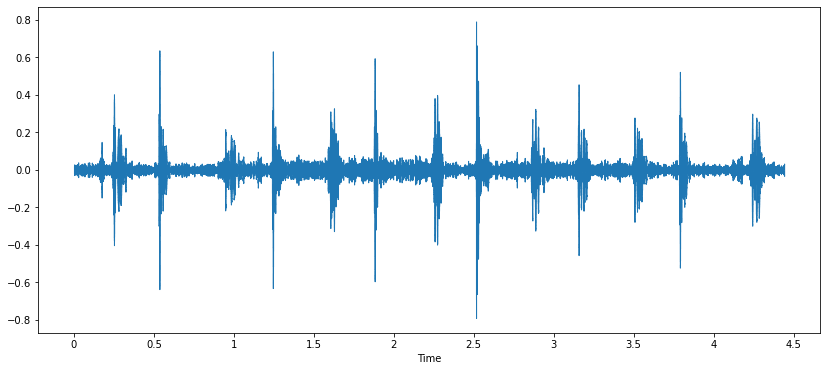

In [40]:
waveplot_function(normal_sound_address)

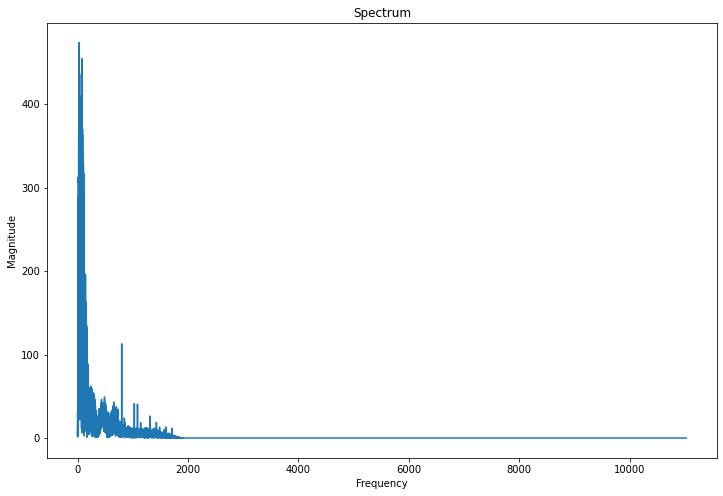

In [41]:
spectrum(normal_sound_address)

C:\Users\utfu\AppData\Local\Temp\ipykernel_10028\2493310413.py:8: FutureWarning: Pass y=[-0.00593654 -0.00776841 -0.00978827 ... -0.01335202 -0.00816996
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(sample_sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)


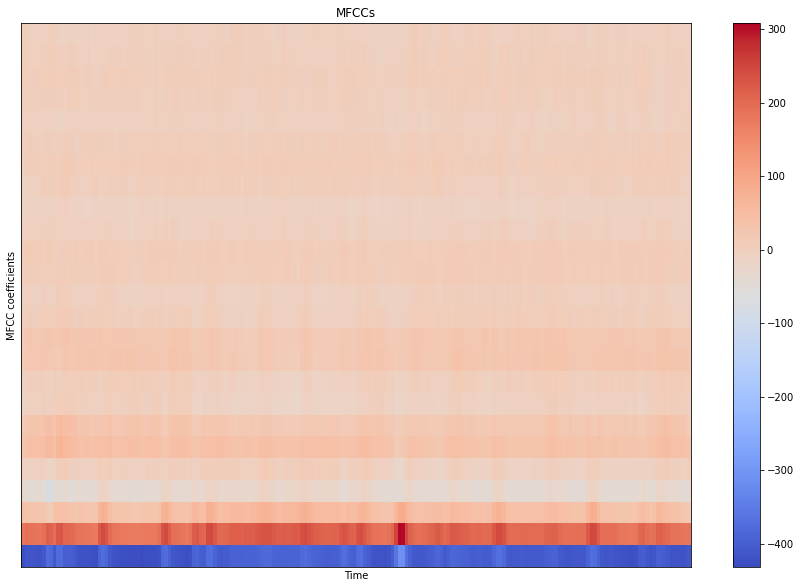

In [42]:
MFCCS(normal_sound_address)

murmur


In [43]:
random_murmur=np.random.randint(0,len(murmur_data))
murmur_sound_address = murmur_data.iloc[random_murmur]["WAV"]

In [44]:
playing_function(murmur_sound_address)

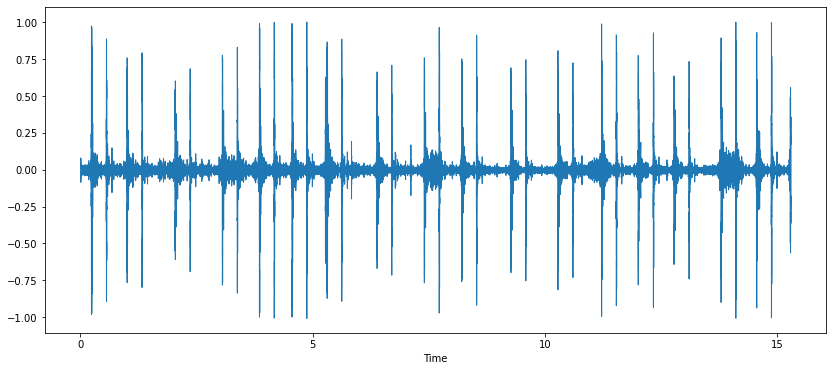

In [45]:
waveplot_function(murmur_sound_address)

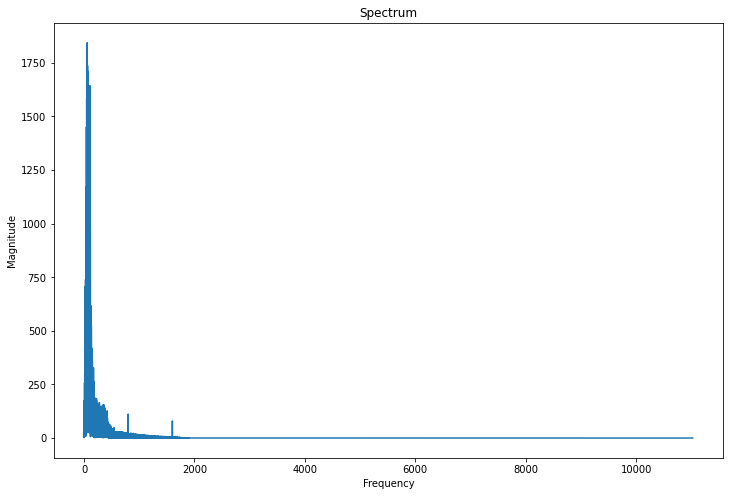

In [46]:
spectrum(murmur_sound_address)

C:\Users\utfu\AppData\Local\Temp\ipykernel_10028\2493310413.py:8: FutureWarning: Pass y=[0.05094216 0.05784079 0.06285883 ... 0.04074943 0.02436938 0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(sample_sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)


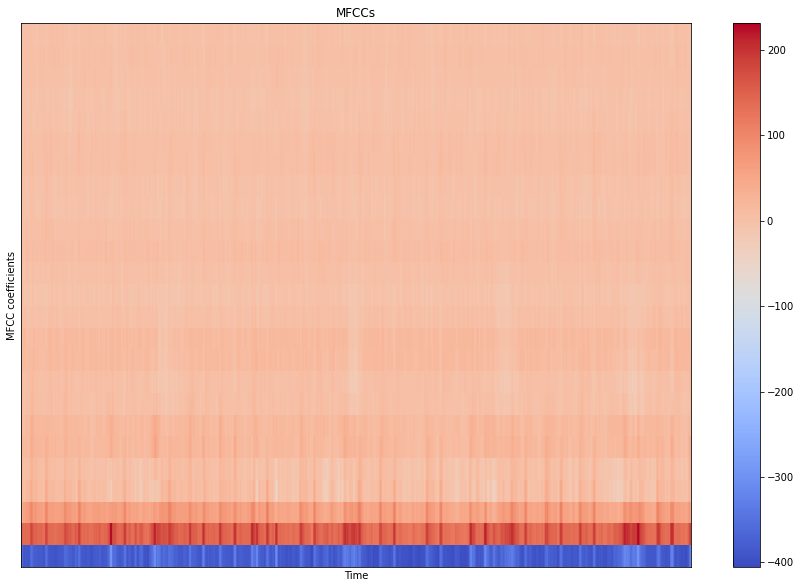

In [47]:
MFCCS(murmur_sound_address)

extrastole

In [48]:
random_extrastole=np.random.randint(0,len(extrastole_data))
extrastole_sound_address = extrastole_data.iloc[random_extrastole]["WAV"]

In [49]:
playing_function(extrastole_sound_address)

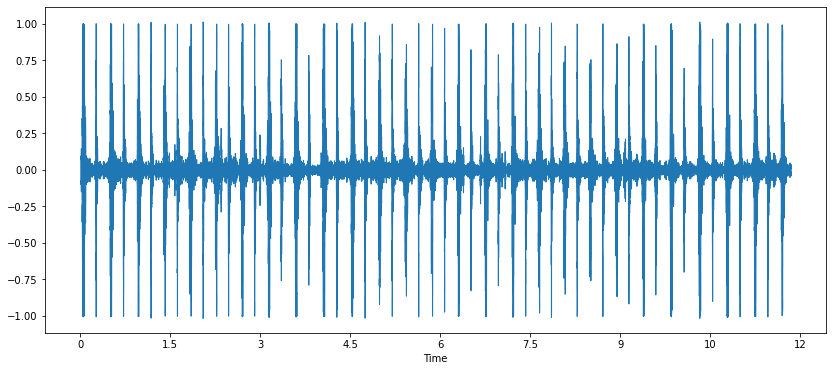

In [50]:
waveplot_function(extrastole_sound_address)

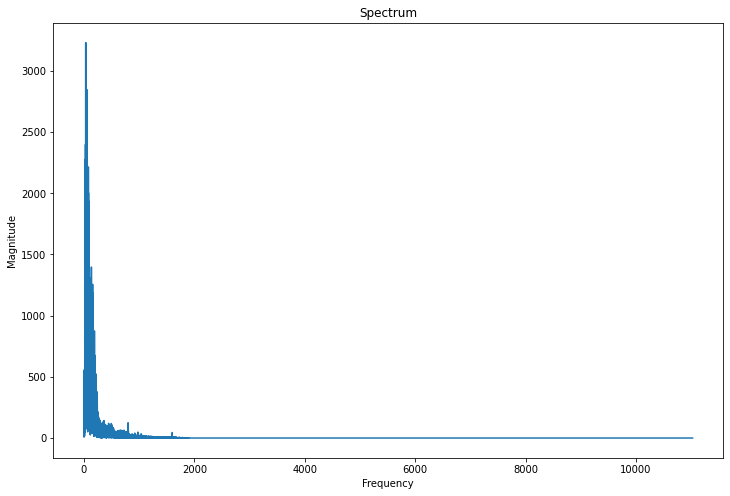

In [51]:

spectrum(extrastole_sound_address)

C:\Users\utfu\AppData\Local\Temp\ipykernel_10028\2493310413.py:8: FutureWarning: Pass y=[-0.06011626 -0.06608696 -0.06936575 ...  0.01799242  0.01132699
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(sample_sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)


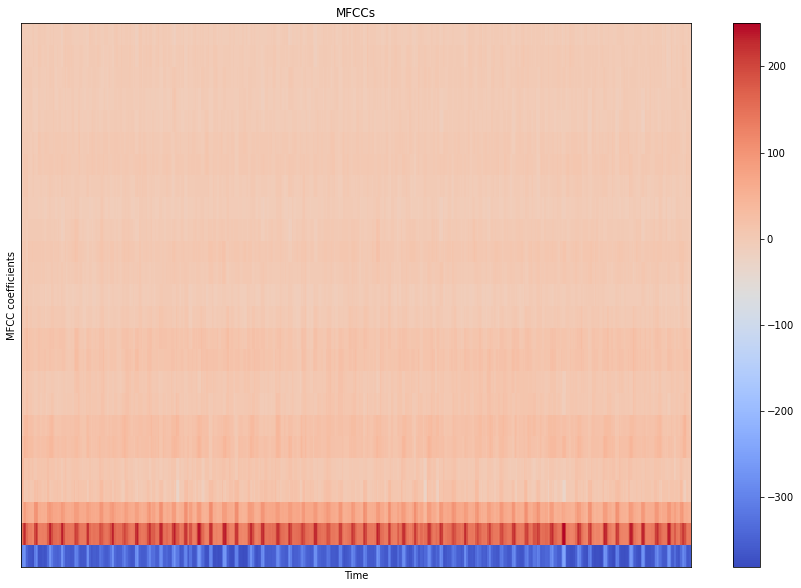

In [52]:
MFCCS(extrastole_sound_address)

artifact

In [53]:
random_artifact=np.random.randint(0,len(artifact_data))
artifact_sound_address = artifact_data.iloc[random_artifact]["WAV"]

In [54]:
playing_function(artifact_sound_address)

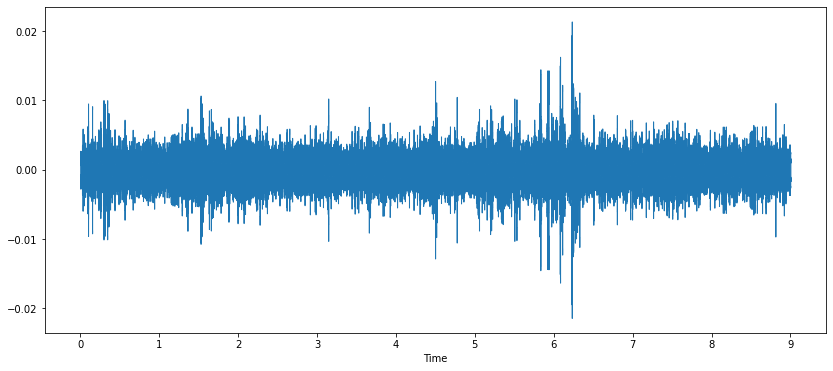

In [55]:
waveplot_function(artifact_sound_address)

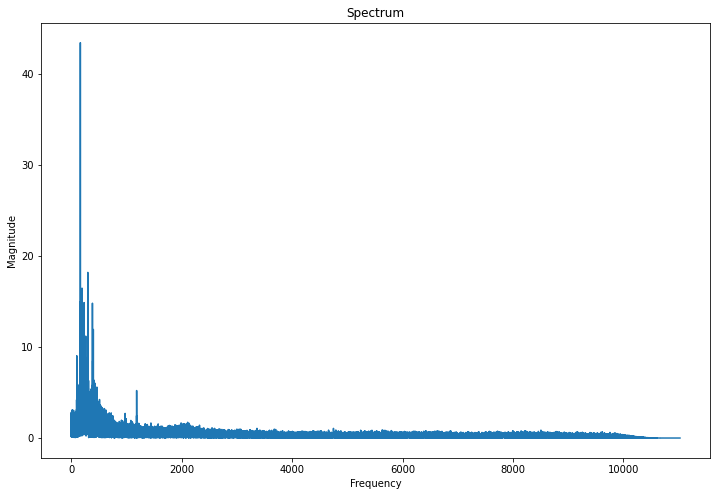

In [56]:
spectrum(artifact_sound_address)

C:\Users\utfu\AppData\Local\Temp\ipykernel_10028\2493310413.py:8: FutureWarning: Pass y=[-0.00181458 -0.00271137 -0.00249239 ...  0.00011131 -0.00048922
  0.00047872], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(sample_sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)


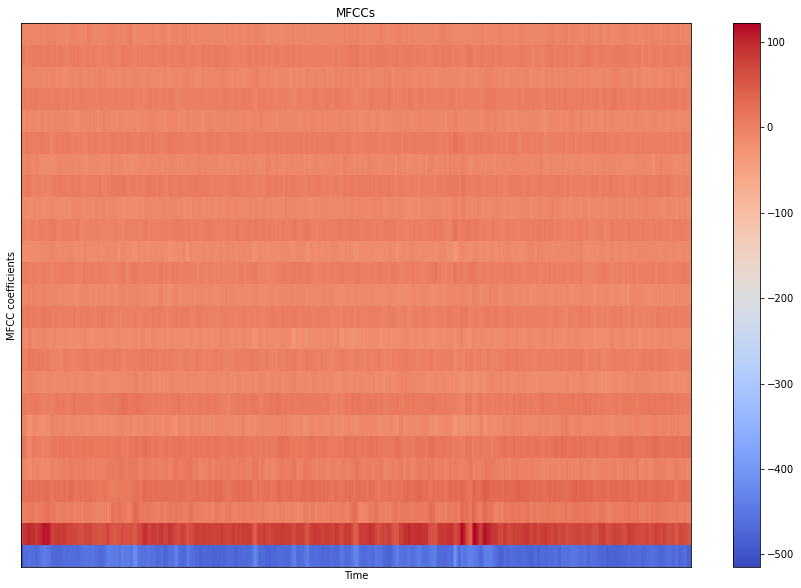

In [57]:
MFCCS(artifact_sound_address)

extrahls

In [58]:
random_extrahls=np.random.randint(0,len(extrahls_data))
extrahls_sound_address=extrahls_data.iloc[random_extrahls]["WAV"]

In [59]:
playing_function(extrahls_sound_address)

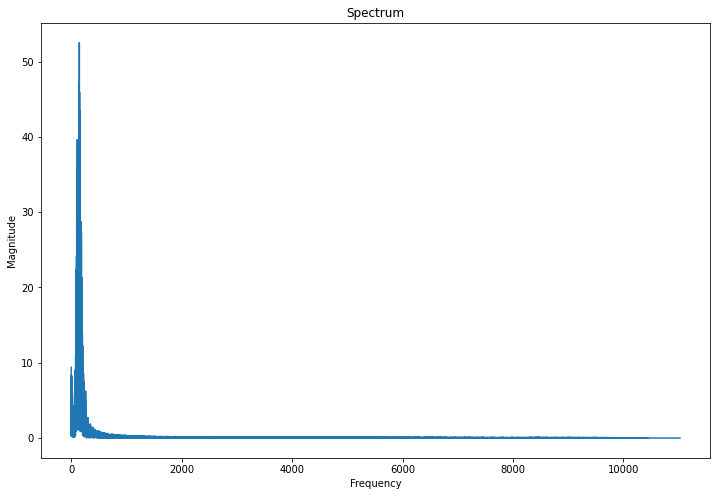

In [60]:
spectrum(extrahls_sound_address)

C:\Users\utfu\AppData\Local\Temp\ipykernel_10028\2493310413.py:8: FutureWarning: Pass y=[-4.3862474e-05  8.4505627e-05  1.3877093e-04 ...  5.0741390e-05
 -4.3823187e-05 -4.3335185e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(sample_sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)


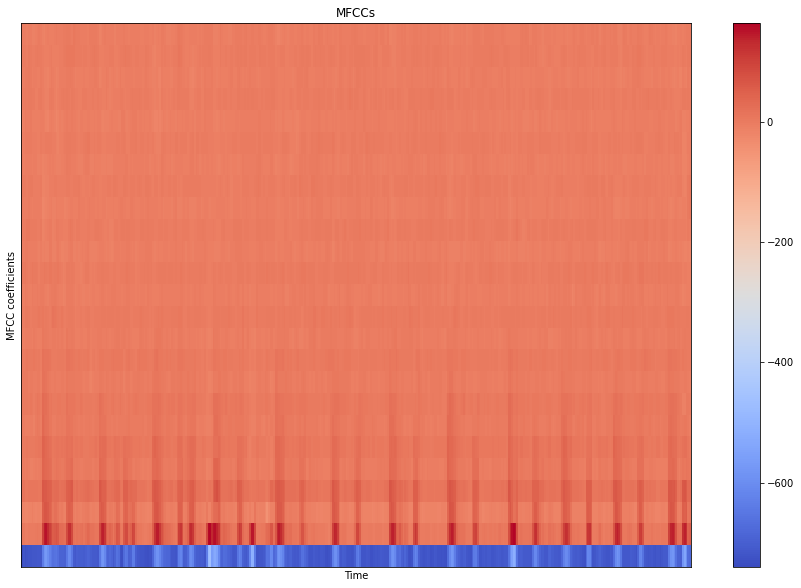

In [61]:
MFCCS(extrahls_sound_address)

Dataloading Function (to be altered)

In [62]:
def load_file_data (folder,file_names, duration=12, sr=22050):
    input_length=sr*duration
    # function to load files and extract features
    data = []    
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            X, sr = librosa.load( sound_file, sr=sr, duration=duration) 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)                          
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=100).T,axis=0)  
                     
        except Exception as e:
            print("Error encountered while parsing file: ", file_name)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

In [63]:
# Encodeing the five types: 'artifact','murmur','normal'
# ('extrastole','extrahls') are murmurs
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
CLASSES = ['artifact','murmur','normal']
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)

int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [64]:
INPUT_DIR="C:\\Users\\utfu\\Downloads\\Heart Sound Classification"
MAX_SOUND_CLIP_DURATION=12

In [65]:
import os, fnmatch

A_folder=INPUT_DIR+'/set_a/'
# set-a
A_artifact_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'artifact*.wav')
A_artifact_sounds = load_file_data(folder=A_folder,file_names=A_artifact_files, duration=MAX_SOUND_CLIP_DURATION)
A_artifact_labels = [0 for items in A_artifact_files]

A_normal_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'normal*.wav')
A_normal_sounds = load_file_data(folder=A_folder,file_names=A_normal_files, duration=MAX_SOUND_CLIP_DURATION)
A_normal_labels = [2 for items in A_normal_sounds]

A_extrahls_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'extrahls*.wav')
A_extrahls_sounds = load_file_data(folder=A_folder,file_names=A_extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
A_extrahls_labels = [1 for items in A_extrahls_sounds]

A_murmur_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'murmur*.wav')
A_murmur_sounds = load_file_data(folder=A_folder,file_names=A_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
A_murmur_labels = [1 for items in A_murmur_files]


load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_a/artifact__201012172012.wav
fixing audio lenght : artifact__201012172012.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_a/artifact__201105040918.wav


C:\Users\utfu\AppData\Local\Temp\ipykernel_10028\3432038162.py:14: FutureWarning: Pass size=264600 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y = librosa.util.fix_length(X, input_length)


fixing audio lenght : artifact__201105040918.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_a/artifact__201105041959.wav
fixing audio lenght : artifact__201105041959.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_a/artifact__201105051017.wav
fixing audio lenght : artifact__201105051017.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_a/artifact__201105060108.wav
fixing audio lenght : artifact__201105060108.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_a/artifact__201105061143.wav
fixing audio lenght : artifact__201105061143.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_a/artifact__201105190800.wav
fixing audio lenght : artifact__201105190800.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_a/artifact__201105280851.wav
fixing audio lenght : artifact__201105280851.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_a/artifact__201106010

In [66]:
len(A_murmur_sounds)

34

In [67]:
B_folder=INPUT_DIR+'/set_b/'
# set-b
B_normal_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'normal*.wav')  # include noisy files
B_normal_sounds = load_file_data(folder=B_folder,file_names=B_normal_files, duration=MAX_SOUND_CLIP_DURATION)
B_normal_labels = [2 for items in B_normal_sounds]

B_murmur_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'murmur*.wav')  # include noisy files
B_murmur_sounds = load_file_data(folder=B_folder,file_names=B_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
B_murmur_labels = [1 for items in B_murmur_files]

B_extrastole_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'extrastole*.wav')
B_extrastole_sounds = load_file_data(folder=B_folder,file_names=B_extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
B_extrastole_labels = [1 for items in B_extrastole_files]

load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_b/normal_noisynormal_101_1305030823364_B.wav
fixing audio lenght : normal_noisynormal_101_1305030823364_B.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_b/normal_noisynormal_101_1305030823364_E.wav
fixing audio lenght : normal_noisynormal_101_1305030823364_E.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_b/normal_noisynormal_104_1305032492469_A.wav


C:\Users\utfu\AppData\Local\Temp\ipykernel_10028\3432038162.py:14: FutureWarning: Pass size=264600 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y = librosa.util.fix_length(X, input_length)


fixing audio lenght : normal_noisynormal_104_1305032492469_A.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_b/normal_noisynormal_105_1305033453095_A.wav
fixing audio lenght : normal_noisynormal_105_1305033453095_A.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_b/normal_noisynormal_105_1305033453095_C.wav
fixing audio lenght : normal_noisynormal_105_1305033453095_C.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_b/normal_noisynormal_106_1306776721273_A.wav
fixing audio lenght : normal_noisynormal_106_1306776721273_A.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_b/normal_noisynormal_107_1305654946865_A.wav
fixing audio lenght : normal_noisynormal_107_1305654946865_A.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classification/set_b/normal_noisynormal_108_1305654420093_A.wav
fixing audio lenght : normal_noisynormal_108_1305654420093_A.wav
load file  C:\Users\utfu\Downloads\Heart Sound Classifi

In [68]:
x1_data = np.concatenate((A_artifact_sounds, A_normal_sounds,A_extrahls_sounds,A_murmur_sounds, 
                         B_normal_sounds,B_murmur_sounds,B_extrastole_sounds))

y1_data = np.concatenate((A_artifact_labels, A_normal_labels,A_extrahls_labels,A_murmur_labels,
                         B_normal_labels,B_murmur_labels,B_extrastole_labels))
print ("combined training data record: ",len(y1_data))
print(y1_data.shape)

combined training data record:  585
(585,)


In [69]:
X1_train, X1_rem, y1_train, y1_rem = train_test_split(x1_data,y1_data, train_size=0.8, shuffle=True )
X1_valid, X1_test, y1_valid, y1_test = train_test_split(X1_rem,y1_rem, test_size=0.5, shuffle=True )
print(y1_train.shape)

(468,)


In [70]:
import tensorflow as tf

In [71]:
y1_train = np.array(tf.keras.utils.to_categorical(y1_train, len(CLASSES)))
y1_test = np.array(tf.keras.utils.to_categorical(y1_test, len(CLASSES)))
y1_valid = np.array(tf.keras.utils.to_categorical(y1_valid, len(CLASSES)))

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics 
from sklearn.metrics import classification_report, accuracy_score

In [73]:
model1 = Sequential()

model1.add(Bidirectional(LSTM(128, dropout=0.05 ,recurrent_dropout=0.20, return_sequences=True), input_shape = (100,1)))

model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(128,activation='relu'))

model1.add(Dense(128,activation='relu'))
model1.add(Flatten())

model1.add(Dense(3, activation='softmax'))

model1.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=['acc'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 100, 256)         133120    
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 100, 128)          32896     
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 dense_3 (Dense)             (None, 100, 128)          16512     
                                                                 
 dense_4 (Dense)             (None, 100, 128)          16512     
                                                                 
 dense_5 (Dense)             (None, 100, 128)          16512     
                                                      

In [74]:
MAX_PATIENT=12
MAX_EPOCHS=100
MAX_BATCH=32




# training
history=model1.fit(X1_train, y1_train, 
                  batch_size=MAX_BATCH, 
                  epochs=MAX_EPOCHS,
                  validation_data=(X1_valid,y1_valid)) 



Epoch 1/100
15/15 [==============================] - 6s 190ms/step - loss: 1.0410 - acc: 0.5684 - val_loss: 0.7616 - val_acc: 0.4655
Epoch 2/100
15/15 [==============================] - 2s 157ms/step - loss: 0.6818 - acc: 0.6474 - val_loss: 0.6462 - val_acc: 0.7586
Epoch 3/100
15/15 [==============================] - 2s 157ms/step - loss: 0.6387 - acc: 0.6923 - val_loss: 0.5624 - val_acc: 0.7586
Epoch 4/100
15/15 [==============================] - 2s 148ms/step - loss: 0.6233 - acc: 0.6944 - val_loss: 0.6265 - val_acc: 0.6897
Epoch 5/100
15/15 [==============================] - 2s 149ms/step - loss: 0.6094 - acc: 0.7115 - val_loss: 0.6145 - val_acc: 0.6897
Epoch 6/100
15/15 [==============================] - 2s 147ms/step - loss: 0.5893 - acc: 0.6987 - val_loss: 0.5878 - val_acc: 0.7241
Epoch 7/100
15/15 [==============================] - 2s 148ms/step - loss: 0.6371 - acc: 0.6731 - val_loss: 0.6875 - val_acc: 0.5517
Epoch 8/100
15/15 [==============================] - 2s 151ms/step - 

In [75]:
score = model1.evaluate(X1_train, y1_train, verbose=0) 
print ("model train data score       : ",round(score[1]*100) , "%")

score = model1.evaluate(X1_test, y1_test, verbose=0) 
print ("model test data score        : ",round(score[1]*100) , "%")

model train data score       :  91 %
model test data score        :  64 %


In [76]:
y_pred = model1.predict(X1_test)

#check scores
scores = model1.evaluate(X1_test, y1_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

2/2 [==============================] - 0s 38ms/step - loss: 1.1974 - acc: 0.6441
Model evaluation accuracy:  64 %


In [77]:
y_pred = np.asarray(model1.predict(X1_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)

In [78]:
target_names = ["artifact", "murmur","normal"]
print(classification_report(y1_test.argmax(axis=1), y_pred, target_names = target_names))

              precision    recall  f1-score   support

    artifact       0.75      0.75      0.75         4
      murmur       0.48      0.63      0.55        19
      normal       0.77      0.64      0.70        36

    accuracy                           0.64        59
   macro avg       0.67      0.67      0.66        59
weighted avg       0.67      0.64      0.65        59



USING KNN (MACHINE LEARNING METHOD)

In [84]:
nsamples, nx, ny = X1_train.shape
d2_train_dataset = X1_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X1_test.shape
d3_train_dataset = X1_test.reshape((nsamples,nx*ny))


In [93]:
from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier(n_neighbors=3)

model3.fit(d2_train_dataset,y1_train)
y__pred=model3.predict(d3_train_dataset)
poly_accuracy = accuracy_score(y1_test, y__pred)
print(poly_accuracy*100)

67.79661016949152


no. of mfccs directly proportional to accuracy
